<a href="https://colab.research.google.com/github/semishen/Chinese-NLP-Practices/blob/main/10_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load Data

In [ ]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/google_comments.xlsx'
google = pd.read_excel(url, index_col=0)
print(google.shape)
google.head()

(500, 3)


username  ...                                            comment
0                  ÂÄ™‰æùËäô  ...  Ëµ∑ÂàùÊâæ‰∏çÂà∞ÂÖ•Âè£ÔºåÈÇÑ‰ª•ÁÇ∫Ê≤íÂ∫ß‰ΩçÔºå‰ΩÜÊòØÂéü‰æÜÂÖ•Âè£Âú®ÊóÅÈÇäÊ®ìÊ¢ØÔΩûÂ∫ß‰ΩçÂçÄ‰∏çÂ§ßÔºå‰ΩÜÊòØÊñôÁêÜÂæàÂ•ΩÂêÉÔΩûËÇâÂúìÁöÑÈÜ¨ÂæÆ...
1                MimiÈæç  ...  ËÅûÂêçÂ∑≤‰πÖÔºå‰ªäÂ§©ÁâπÂà•‰æÜÁèæÂ†¥Ë©¶Ë©¶ÔºåÁõÆÂâçÊîπÊàêÈªûÈ§êÊ©üÈªûÈ§êÔºå ‚ãØ‚ãØÊõ¥Â§öËÅûÂêçÂ∑≤‰πÖÔºå‰ªäÂ§©ÁâπÂà•‰æÜÁèæÂ†¥Ë©¶Ë©¶ÔºåÁõÆ...
2                  ÊûóÊòåÈÄ∏  ...          ÈùûÂ∏∏ÁîüÊ∞£ÊúçÂãôÂì°ÁöÑÊÖãÂ∫¶üò†ÊúçÂãôÂæàÁ≥üÁ≥ïÔºåÈ∫µÈÉΩÈÇÑÊ≤íÂêÉÂÆåÔºå‰∏ÄËµ∑Ë∫´Â∞±ÊääÈ∫µÊî∂Ëµ∞ÔºåÊì∫ÊòéË∂ïÂÆ¢‰∫∫üò°üò°üò°
3                  ÊûóÂπ∏ËìÅ  ...  ÂÖßÁî®ËàáÂ§ñÂ∏∂Êúâ‰∏çÂêåÁöÑÈªûÈ§êÊñπÂºèÂÖßÁî®È†àËá≥Â∫óÂÖß‰ΩøÁî®Ê©üÂè∞ÈªûËèú„ÄÅËº∏ÂÖ•Ê°åËôü‰∏¶‰ªòÊ¨æÂ§ñÂ∏∂Â•ΩÂÉèÂè™ÈúÄÂú®ÂÖ•Âè£ËôïÈªûÈ§êÂç≥...
4  Âè∞ÁÅ£TAXIÂ∏ÇÂçÄÂè´ËªäÁ¶ÆËªäÂåÖËªäÁ¥ÑÊãçÊâæÂ∞èÈÑ≠  ...  ‰πæÊ∑®Ë°õÁîüÔºåÂªÅÊâÄÂæàÂ§ßÂú®Âú∞‰∏ãÂÆ§ÔºåÊúâÂÖçË≤ªÈ£≤ÊñôÂèØ‰ª•ÂñùÔºåÊãâÈ∫µÊÑõÂ•ΩÂêÉÔºåÈ∫ªËæ£Ë±ÜËÖê‰∏çÈåØ„ÄÅËÇâÁ≤Ω‰∏çÈåØÔºåÁõÆÂâçÂêÉÈÅéÂæà...

[5 rows x 3 columns]

# 2. Data preprocessing
1. convert score to status (good:1, bad:0, soso:-1)
2. build a new df with status (1, 0) and comment 

In [ ]:
def score_to_status(x):
  assert isinstance(x, int), 'x is not an int'
  assert (x >= 0) and (x <= 5), 'x is out of range(0-5)'

  if x > 3:
    return 1
  elif x == 3:
    return -1
  else:
    return 0

google['status'] = google['score'].map(score_to_status)
print(google['status'].value_counts())
google.head()

 1    239
 0    201
-1     60
Name: status, dtype: int64


username  ...  status
0                  ÂÄ™‰æùËäô  ...       1
1                MimiÈæç  ...       1
2                  ÊûóÊòåÈÄ∏  ...       0
3                  ÊûóÂπ∏ËìÅ  ...       1
4  Âè∞ÁÅ£TAXIÂ∏ÇÂçÄÂè´ËªäÁ¶ÆËªäÂåÖËªäÁ¥ÑÊãçÊâæÂ∞èÈÑ≠  ...       1

[5 rows x 4 columns]

In [ ]:
df_good_bad = google[google['status'].isin([0,1])]
print(df_good_bad.shape)
df_good_bad.head()

(440, 4)


username  ...  status
0                  ÂÄ™‰æùËäô  ...       1
1                MimiÈæç  ...       1
2                  ÊûóÊòåÈÄ∏  ...       0
3                  ÊûóÂπ∏ËìÅ  ...       1
4  Âè∞ÁÅ£TAXIÂ∏ÇÂçÄÂè´ËªäÁ¶ÆËªäÂåÖËªäÁ¥ÑÊãçÊâæÂ∞èÈÑ≠  ...       1

[5 rows x 4 columns]

In [ ]:
 df = df_good_bad.loc[:,['comment','status']]
 df.head()

comment  status
0  Ëµ∑ÂàùÊâæ‰∏çÂà∞ÂÖ•Âè£ÔºåÈÇÑ‰ª•ÁÇ∫Ê≤íÂ∫ß‰ΩçÔºå‰ΩÜÊòØÂéü‰æÜÂÖ•Âè£Âú®ÊóÅÈÇäÊ®ìÊ¢ØÔΩûÂ∫ß‰ΩçÂçÄ‰∏çÂ§ßÔºå‰ΩÜÊòØÊñôÁêÜÂæàÂ•ΩÂêÉÔΩûËÇâÂúìÁöÑÈÜ¨ÂæÆ...       1
1  ËÅûÂêçÂ∑≤‰πÖÔºå‰ªäÂ§©ÁâπÂà•‰æÜÁèæÂ†¥Ë©¶Ë©¶ÔºåÁõÆÂâçÊîπÊàêÈªûÈ§êÊ©üÈªûÈ§êÔºå ‚ãØ‚ãØÊõ¥Â§öËÅûÂêçÂ∑≤‰πÖÔºå‰ªäÂ§©ÁâπÂà•‰æÜÁèæÂ†¥Ë©¶Ë©¶ÔºåÁõÆ...       1
2          ÈùûÂ∏∏ÁîüÊ∞£ÊúçÂãôÂì°ÁöÑÊÖãÂ∫¶üò†ÊúçÂãôÂæàÁ≥üÁ≥ïÔºåÈ∫µÈÉΩÈÇÑÊ≤íÂêÉÂÆåÔºå‰∏ÄËµ∑Ë∫´Â∞±ÊääÈ∫µÊî∂Ëµ∞ÔºåÊì∫ÊòéË∂ïÂÆ¢‰∫∫üò°üò°üò°       0
3  ÂÖßÁî®ËàáÂ§ñÂ∏∂Êúâ‰∏çÂêåÁöÑÈªûÈ§êÊñπÂºèÂÖßÁî®È†àËá≥Â∫óÂÖß‰ΩøÁî®Ê©üÂè∞ÈªûËèú„ÄÅËº∏ÂÖ•Ê°åËôü‰∏¶‰ªòÊ¨æÂ§ñÂ∏∂Â•ΩÂÉèÂè™ÈúÄÂú®ÂÖ•Âè£ËôïÈªûÈ§êÂç≥...       1
4  ‰πæÊ∑®Ë°õÁîüÔºåÂªÅÊâÄÂæàÂ§ßÂú®Âú∞‰∏ãÂÆ§ÔºåÊúâÂÖçË≤ªÈ£≤ÊñôÂèØ‰ª•ÂñùÔºåÊãâÈ∫µÊÑõÂ•ΩÂêÉÔºåÈ∫ªËæ£Ë±ÜËÖê‰∏çÈåØ„ÄÅËÇâÁ≤Ω‰∏çÈåØÔºåÁõÆÂâçÂêÉÈÅéÂæà...       1

# 3. Word Segmentation
1. build a corpus by jieba segmentation
2. build TF-IDF matrix

In [ ]:
import jieba

corpus = []
tags = df['status'].tolist()

for c in df['comment']:
  corpus.append(' '.join(jieba.cut(c)))

corpus[0]

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.627 seconds.
Prefix dict has been built successfully.


'Ëµ∑Âàù Êâæ ‰∏çÂà∞ ÂÖ•Âè£ Ôºå ÈÇÑ‰ª• ÁÇ∫ Ê≤í Â∫ß‰Ωç Ôºå ‰ΩÜÊòØ Âéü‰æÜ ÂÖ•Âè£ Âú® ÊóÅÈÇä Ê®ìÊ¢Ø ÔΩû Â∫ß‰Ωç ÂçÄ‰∏çÂ§ß Ôºå ‰ΩÜÊòØ ÊñôÁêÜ Âæà Â•ΩÂêÉ ÔΩû ËÇâÂúì ÁöÑ ÈÜ¨ ÂæÆÁîú Ôºå Âè£ÊÑü Ê∏ÖÁàΩ ÔΩû Áîú‰∏çËæ£ ÈÜ¨Ê±Å Áúã Ëµ∑‰æÜ È°èËâ≤ Â∑Æ‰∏çÂ§ö Ôºå ‰ΩÜÊòØ Âè£ÊÑü ÊòØ Èππ ‰∏≠ Êúâ ÂæÆÂæÆ Ëæ£ Ôºå ÈÉΩ Âæà ‰∏çÈåØ ÔºÅ È∫ªÈÜ¨ È∫µ ÁöÑ È∫ªÈÜ¨ Ê≤íÊúâ ÂêùËâ≤ Êîæ Ôºå ÊâÄ‰ª• ÂêÉ Ëµ∑‰æÜ È∫ªÈÜ¨ ËÉΩ Âùá ÂãªÂàÜ ‰Ωà Âú® È∫µ ‰∏ä Ôºå ÊòØ ÂêÉÈÅé ÁöÑ Â•ΩÂêÉ È∫ªÈÜ¨ È∫µ ‰πã‰∏Ä Ôºå Êå∫ ËÆö ÁöÑ Âñî ÔºÅ ÂñúÁï™ ‚Ä¶ ‰ªäÂ§© ÈÅáÂà∞ ‰∏Ä‰Ωç Â∏•Ê∞£ ÊúâÂûã ÁöÑ Âúã‰∏≠Áîü ËÆì Â∫ß Ôºå ÁúüÊÑüÂãï Ôºå ÁèæÂú® ËÉΩ ÈÅáÂà∞ ÂñÆÁ¥î ÊúâÁ¶Æ ÁöÑ ÈùíÂπ¥ Â≠∏Â≠ê Ôºå ÈÉΩ ÊòØ ‰∏ÄÁ®Æ Âπ∏ÈÅã ÔºÅ'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

# 4. Naive Bayes
1. split dataset as train, test
2. naive bayes analysis

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(tfidf, tags, test_size = 0.3, random_state = 42)
print(train_x.shape, test_x.shape)

(308, 2693) (132, 2693)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB(alpha=0.01)
clf1.fit(train_x, train_y)
pred_nb = clf1.predict(test_x)
print(f'acc:{clf1.score(test_x, test_y)}')

acc:0.8257575757575758


# 5. SVM

In [ ]:
from sklearn.svm import SVC
clf2 = SVC(probability=True)
clf2.fit(train_x, train_y)
pred_svm = clf2.predict(test_x)
print(f'acc:{clf2.score(test_x, test_y)}')

acc:0.8863636363636364


#6. SVM with Word2Vec
1. recontrust corpus
2. build a Word2Vec model
3. train Word2Vec
4. SVM with Word2Vec

In [ ]:
corpus_word2vec = []
for c in corpus:
  corpus_word2vec.append(c.split())
corpus_word2vec[0]

['Ëµ∑Âàù',
 'Êâæ',
 '‰∏çÂà∞',
 'ÂÖ•Âè£',
 'Ôºå',
 'ÈÇÑ‰ª•',
 'ÁÇ∫',
 'Ê≤í',
 'Â∫ß‰Ωç',
 'Ôºå',
 '‰ΩÜÊòØ',
 'Âéü‰æÜ',
 'ÂÖ•Âè£',
 'Âú®',
 'ÊóÅÈÇä',
 'Ê®ìÊ¢Ø',
 'ÔΩû',
 'Â∫ß‰Ωç',
 'ÂçÄ‰∏çÂ§ß',
 'Ôºå',
 '‰ΩÜÊòØ',
 'ÊñôÁêÜ',
 'Âæà',
 'Â•ΩÂêÉ',
 'ÔΩû',
 'ËÇâÂúì',
 'ÁöÑ',
 'ÈÜ¨',
 'ÂæÆÁîú',
 'Ôºå',
 'Âè£ÊÑü',
 'Ê∏ÖÁàΩ',
 'ÔΩû',
 'Áîú‰∏çËæ£',
 'ÈÜ¨Ê±Å',
 'Áúã',
 'Ëµ∑‰æÜ',
 'È°èËâ≤',
 'Â∑Æ‰∏çÂ§ö',
 'Ôºå',
 '‰ΩÜÊòØ',
 'Âè£ÊÑü',
 'ÊòØ',
 'Èππ',
 '‰∏≠',
 'Êúâ',
 'ÂæÆÂæÆ',
 'Ëæ£',
 'Ôºå',
 'ÈÉΩ',
 'Âæà',
 '‰∏çÈåØ',
 'ÔºÅ',
 'È∫ªÈÜ¨',
 'È∫µ',
 'ÁöÑ',
 'È∫ªÈÜ¨',
 'Ê≤íÊúâ',
 'ÂêùËâ≤',
 'Êîæ',
 'Ôºå',
 'ÊâÄ‰ª•',
 'ÂêÉ',
 'Ëµ∑‰æÜ',
 'È∫ªÈÜ¨',
 'ËÉΩ',
 'Âùá',
 'ÂãªÂàÜ',
 '‰Ωà',
 'Âú®',
 'È∫µ',
 '‰∏ä',
 'Ôºå',
 'ÊòØ',
 'ÂêÉÈÅé',
 'ÁöÑ',
 'Â•ΩÂêÉ',
 'È∫ªÈÜ¨',
 'È∫µ',
 '‰πã‰∏Ä',
 'Ôºå',
 'Êå∫',
 'ËÆö',
 'ÁöÑ',
 'Âñî',
 'ÔºÅ',
 'ÂñúÁï™',
 '‚Ä¶',
 '‰ªäÂ§©',
 'ÈÅáÂà∞',
 '‰∏Ä‰Ωç',
 'Â∏•Ê∞£',
 'ÊúâÂûã',
 'ÁöÑ',
 'Âúã‰∏≠Áîü',
 'ËÆì',
 'Â∫ß',
 'Ôºå',
 'ÁúüÊÑüÂãï',
 'Ôºå',
 'ÁèæÂú®',
 'ËÉΩ',
 'ÈÅáÂà∞',
 'ÂñÆÁ¥î',


In [ ]:
from gensim.models import word2vec

# params
seed = 42
sg = 0
window_size = 10
vector_dim = 1000
min_count = 1
workers = -1
epochs = 1000
sample = 1e-5 

model = word2vec.Word2Vec(
  corpus_word2vec,
  min_count = min_count,
  size = vector_dim,
  workers=workers,
  iter=epochs,
  window=window_size,
  sg=sg,
  seed=seed,
  sample = sample
)
len(model.wv.vocab)

3319

In [ ]:
w2v_vecs = []
w2v_tags = []
for tag, s in zip(tags, corpus_word2vec):
  vec = np.zeros(vector_dim)
  cnt = 0
  for w in s:
    if w in model:
      vec += model.wv.get_vector(w)
      cnt += 1
  if cnt > 0:
    w2v_vecs.append(vec / cnt) # use average to represent sentence
    w2v_tags.append(tag)

# sentence vector
w2v_x = np.array(w2v_vecs)
print(w2v_x.shape)

# target
w2v_y = np.array(w2v_tags)
print(w2v_y.shape)

(440, 1000)
(440,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys


In [ ]:
train_w2v_x, test_w2v_x, train_w2v_y, test_w2v_y = train_test_split(w2v_x, w2v_y, test_size = 0.3, random_state = 42)
print(train_w2v_x.shape)
print(test_w2v_x.shape)

(308, 1000)
(132, 1000)


In [ ]:
clf3 = SVC(probability=True)
clf3.fit(train_w2v_x, train_w2v_y)
pred_w2v_svm = clf3.predict(test_w2v_x)
print(f'acc:{clf3.score(test_w2v_x, test_w2v_y)}')

acc:0.7803030303030303


# 7. BERT
1. load simpletransformers lib
2. recontract df good:1, bad:0
2. build and train BERT model

In [ ]:
! pip install simpletransformers

In [ ]:
train_df, eval_df = train_test_split(df, test_size = 0.3, random_state = 42)
print(train_df.shape)
print(eval_df.shape)

(308, 2)
(132, 2)


In [ ]:
from simpletransformers.classification import ClassificationModel as CM

bert_model_args = {
    "num_train_epochs": 5
}
clf4 = CM('bert', 'bert-base-chinese', args=bert_model_args)
clf4.train_model(train_df, args = {'overwrite_output_dir': True})
result, model_output, wrong_predictions = clf4.eval_model(eval_df)
bert_acc = (result['tn'] + result['tp'])/ (result['tn'] + result['tp'] + result['fn'] + result['fp'])
print(f'acc:{bert_acc}')

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassificati

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:776: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."



acc:0.9545454545454546


# 8. Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

acc_nb = accuracy_score(test_y,pred_nb)
acc_svm = accuracy_score(test_y,pred_svm)
acc_w2v_svm = accuracy_score(test_w2v_y,pred_w2v_svm)

print('Naive Bayes: ', acc_nb)
print('SVM: ', acc_svm)
print('SVM with Word2Vec: ', acc_w2v_svm)
print('BERT: ', bert_acc)


Naive Bayes:  0.8257575757575758
SVM:  0.8863636363636364
SVM with Word2Vec:  0.7803030303030303
BERT:  0.9545454545454546


# 9. AUC
1. compute predict possinilities
2. calculate AUC base on roc_curve()

In [ ]:
pred_nb_p = clf1.predict_proba(test_x)
pred_svm_p = clf2.predict_proba(test_x)
pred_w2v_svm_p = clf3.predict_proba(test_w2v_x)
                         
nb_dic = {
    'pred_y':pred_nb_p[:,1],
    'test_y':test_y
}

svm_dic = {
    'pred_y':pred_svm_p[:,1],
    'test_y':test_y
}

w2v_svm_dic = {
    'pred_y':pred_w2v_svm_p[:,1],
    'test_y':test_w2v_y
}

bert_dic = {
    'pred_y':model_output[:,1],
    'test_y':eval_df['status']
}

In [ ]:
from sklearn.metrics import auc, roc_curve

model_dict = {
    'nb': nb_dic,
    'svm': svm_dic,
    'w2v_svm': w2v_svm_dic,
    'bert': bert_dic
}

for key, value in model_dict.items():
  fpr, tpr, thresholds = roc_curve(value['test_y'],value['pred_y'])
  print(f'{key} auc: {auc(fpr, tpr)}') 

nb auc: 0.9074380165289256
svm auc: 0.9537190082644628
w2v_svm auc: 0.8835891381345927
bert auc: 0.9860684769775678


# 10. ROC curve

133
132
133
133


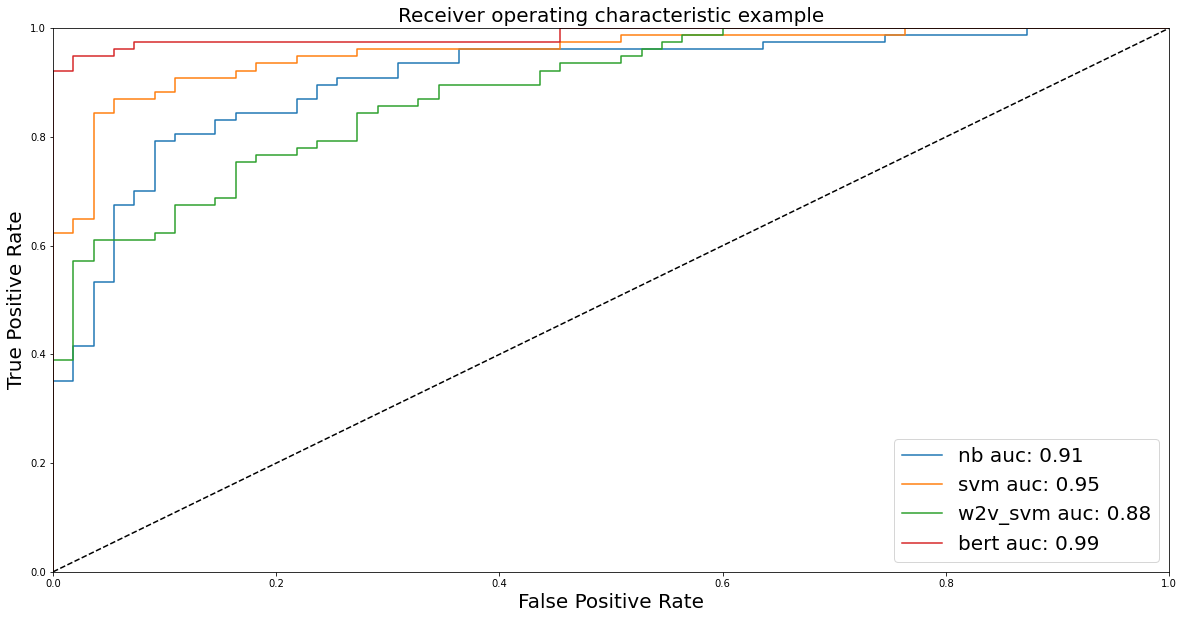

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])

for key, value in model_dict.items():
  fpr, tpr, thresholds = roc_curve(value['test_y'],value['pred_y'], drop_intermediate=False)

  plt.plot(fpr, tpr, label=f'{key} auc: {auc(fpr, tpr):.2f}' )

plt.plot([0, 1], [0, 1], 'k--') # diagonal

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()